In [1]:
! pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
data = pd.read_csv('/content/Elon_musk.csv', encoding = 'latin1', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.shape

(1999, 2)

In [5]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [6]:
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [7]:
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [8]:
data = [x.strip() for x in data.Text]

In [9]:
# removing empty string
data = [x for x in data if x]

In [10]:
data[0:20]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [11]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(data))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [14]:
sentence_df = pd.DataFrame(sentence, columns=['sentence'])
sentence_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [15]:
affin=pd.read_csv('/content/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [16]:
affin_scores=affin.set_index('word')['value'].to_dict()
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [17]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affin_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [18]:
calculate_sentiment(text='admire')

3

In [19]:
sentence_df['sentiment_value']=sentence_df['sentence'].apply(calculate_sentiment)
sentence_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [20]:
sentence_df['word_count']=sentence_df['sentence'].str.split().apply(len)
sentence_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [21]:
sentence_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69
...,...,...,...
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72


In [22]:
sentence_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [23]:
# negative sentiment
sentence_df[sentence_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [24]:
# positive sentiment
sentence_df[sentence_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [25]:
sentence_df['index']=range(0,len(sentence_df))
sentence_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

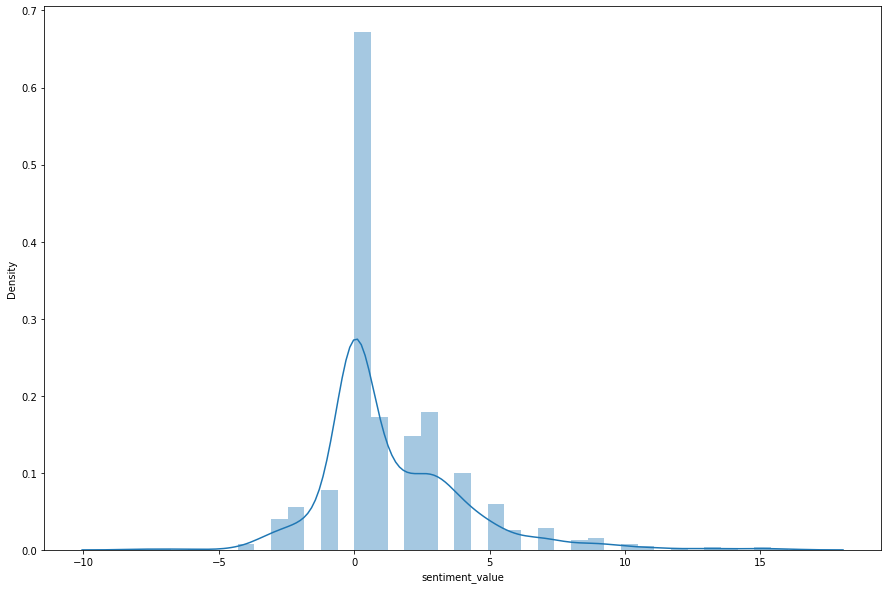

In [26]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sentence_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

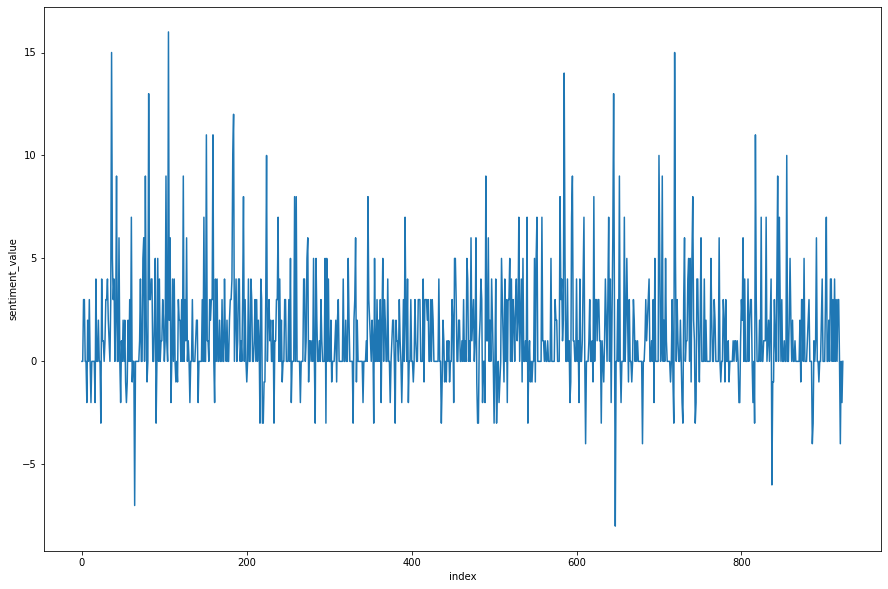

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sentence_df)

<AxesSubplot:title={'center':'Sent sentiment value to sent word count'}, xlabel='word_count', ylabel='sentiment_value'>

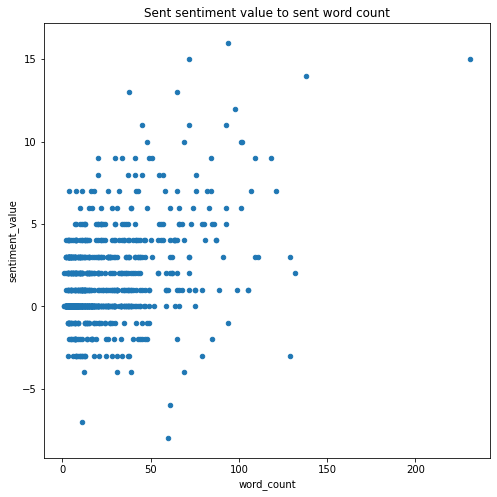

In [28]:
sentence_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sent sentiment value to sent word count')

In [29]:
sentence_df['Sentiment_Class'] = pd.cut(x=sentence_df['sentiment_value'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)

In [30]:
sentence_df.sample(10)

,sentence,sentiment_value,word_count,index,Sentiment_Class
204,<U+0001F409> This is the 1st Out on the pad in...,0,33,204,Neutral
397,"Also, fewer heart attacks, as way easier to pu...",0,13,397,Neutral
902,Maximizing probability of successful launch is...,3,7,902,Positive
720,@CowderySedge @tbdnonymous Very real possibili...,5,35,720,Positive
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15,915,Positive
634,@SpaceX Worth noting that thrust is only sligh...,1,15,634,Positive
356,@BBCTech For sure @MKBHD @Vyyyper Will be wort...,0,35,356,Neutral
797,@Neuro_Skeptic They dont fire all at once.,-2,7,797,Negative
194,Woohoo!!,0,1,194,Neutral
355,should be a browser setting @teslaownerssv @Te...,5,20,355,Positive


<AxesSubplot:xlabel='Sentiment_Class', ylabel='count'>

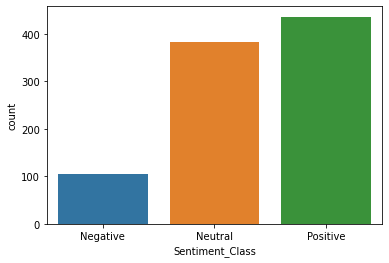

In [31]:
sns.countplot(x = 'Sentiment_Class', data = sentence_df)

In [32]:
sentence_df['Sentiment_Class'].value_counts()

Positive    436
Neutral     382
Negative    105
Name: Sentiment_Class, dtype: int64